In [ ]:
!pip install kaggle --upgrade
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/기존드라이브/kaggletoken/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#!kaggle competitions download -c wikipedia-image-caption
!nvidia-smi

cp: cannot stat '/content/drive/MyDrive/기존드라이브/kaggletoken/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!mkdir data

In [ ]:
!unzip /content/drive/MyDrive/kaggle_data/iris_dataset.zip -d /content/data

Archive:  /content/drive/MyDrive/kaggle_data/iris_dataset.zip
  inflating: /content/data/iris_test.csv  
  inflating: /content/data/iris_train.csv  
  inflating: /content/data/sample_submission.csv  


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('/content/data/iris_train.csv')
test = pd.read_csv('/content/data/iris_test.csv')
sample = pd.read_csv('/content/data/sample_submission.csv')

In [ ]:
train

,id,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
0,0,setosa,4.4,1.4,2.9,0.2
1,1,versicolor,6.4,4.5,3.2,1.5
2,2,virginica,6.2,4.8,2.8,1.8
3,3,virginica,7.2,6.1,3.6,2.5
4,4,setosa,4.9,1.4,3.0,0.2
...,...,...,...,...,...,...
70,70,versicolor,6.5,4.6,2.8,1.5
71,71,versicolor,5.6,3.6,2.9,1.3
72,72,versicolor,6.2,4.5,2.2,1.5
73,73,versicolor,4.9,3.3,2.4,1.0


In [ ]:
# def up_noise(x):
#   return x +np.random.randn(1)[0]/10
# tmp = train.copy()
# tmp['sepal length (cm)'] =  tmp['sepal length (cm)'].apply(lambda x: up_noise(x))
# tmp['petal length (cm)'] =  tmp['petal length (cm)'].apply(lambda x: up_noise(x))
# train = train.append(tmp)
# train

In [ ]:
train['sep'] = train['sepal length (cm)'].apply(lambda x: x**2)
train['pet'] = train['petal length (cm)'].apply(lambda x: x**2)
test['sep'] = test['sepal length (cm)'].apply(lambda x: x**2)
test['pet'] = test['petal length (cm)'].apply(lambda x: x**2)

In [ ]:
y = train[['sepal width (cm)','petal width (cm)']]
x = train.drop(['id','sepal width (cm)','petal width (cm)'],axis=1)

In [ ]:
train

,id,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm),sep,pet
0,0,0,4.4,1.4,2.9,0.2,19.36,1.96
1,1,1,6.4,4.5,3.2,1.5,40.96,20.25
2,2,2,6.2,4.8,2.8,1.8,38.44,23.04
3,3,2,7.2,6.1,3.6,2.5,51.84,37.21
4,4,0,4.9,1.4,3.0,0.2,24.01,1.96
...,...,...,...,...,...,...,...,...
70,70,1,6.5,4.6,2.8,1.5,42.25,21.16
71,71,1,5.6,3.6,2.9,1.3,31.36,12.96
72,72,1,6.2,4.5,2.2,1.5,38.44,20.25
73,73,1,4.9,3.3,2.4,1.0,24.01,10.89


In [ ]:
from lightgbm import LGBMRegressor

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import plot_importance
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()

le = le.fit(train['species'])
train['species'] = le.transform(train['species'])
test['species'] = le.transform(test['species'])

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2)

In [ ]:
train_x.head(3)

,species,sepal length (cm),petal length (cm),sep,pet
36,2,7.2,6.0,51.84,36.00
21,0,5.4,1.7,29.16,2.89
47,1,6.1,4.7,37.21,22.09


In [ ]:
lgbm_sepal = LGBMRegressor()
lgbm_petal = LGBMRegressor()
eval_set_s=[(test_x, test_y['sepal width (cm)']), (train_x, train_y['sepal width (cm)'])]
eval_set_p=[(test_x, test_y['petal width (cm)']), (train_x, train_y['petal width (cm)'])]
lgbm_sepal.fit(train_x,train_y['sepal width (cm)'],eval_set=eval_set_s,eval_metric=['MAE'])

lgbm_petal.fit(train_x,train_y['petal width (cm)'],eval_set=eval_set_p,eval_metric=['MAE'])

[1]	training's l1: 0.288106	training's l2: 0.146575	valid_0's l1: 0.278414	valid_0's l2: 0.156984
[2]	training's l1: 0.287002	training's l2: 0.146015	valid_0's l1: 0.276987	valid_0's l2: 0.156733
[3]	training's l1: 0.28618	training's l2: 0.145561	valid_0's l1: 0.275801	valid_0's l2: 0.156559
[4]	training's l1: 0.285719	training's l2: 0.145079	valid_0's l1: 0.275122	valid_0's l2: 0.156188
[5]	training's l1: 0.285528	training's l2: 0.144672	valid_0's l1: 0.274276	valid_0's l2: 0.156044
[6]	training's l1: 0.284678	training's l2: 0.144244	valid_0's l1: 0.273359	valid_0's l2: 0.155724
[7]	training's l1: 0.284916	training's l2: 0.143879	valid_0's l1: 0.272837	valid_0's l2: 0.155607
[8]	training's l1: 0.283278	training's l2: 0.142545	valid_0's l1: 0.271968	valid_0's l2: 0.154948
[9]	training's l1: 0.282467	training's l2: 0.142195	valid_0's l1: 0.271037	valid_0's l2: 0.154681
[10]	training's l1: 0.282672	training's l2: 0.14188	valid_0's l1: 0.270656	valid_0's l2: 0.154579
[11]	training's l1: 0

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
test.drop(['id'],inplace=True,axis=1)
sepal = lgbm_sepal.predict(test)
petal = lgbm_petal.predict(test)

In [ ]:
sample['sepal width (cm)'] = sepal
sample['petal width (cm)'] = petal

In [ ]:
sample.to_csv('/content/drive/MyDrive/sam.csv',index=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: more than one metric available, picking one to plot.
  


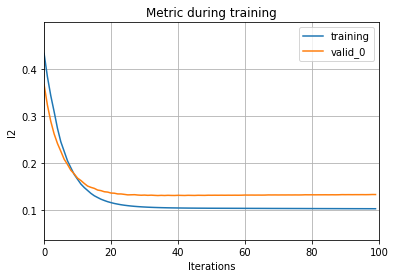

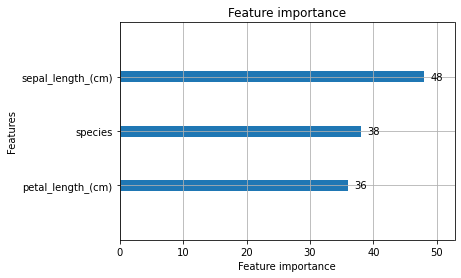

In [ ]:
import lightgbm as lgb
lgb.plot_metric(lgbm_petal)
lgb.plot_importance(lgbm_sepal)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: more than one metric available, picking one to plot.
  


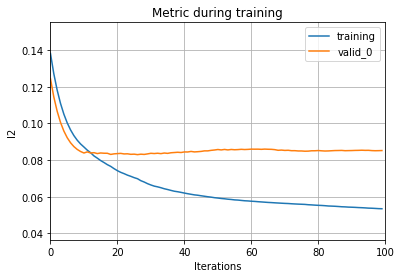

In [ ]:
import lightgbm as lgb
lgb.plot_metric(lgbm_sepal)